In [21]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as sio
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import classify_2p as c2p
import lick_behav_analysis as behav
from matplotlib.lines import Line2D
from scalebars import add_scalebar
import pandas as pd
import random

random.seed(42)

# Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30

from matplotlib.colors import LinearSegmentedColormap
colors = ['#020202', '#ffffff', "#316dc1" ]
custom_cmap = LinearSegmentedColormap.from_list("custom_bwblue", colors, N=256)

In [22]:
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/water deprived sucrose quinine'
f_suc, f_w, base_suc, base_w, aligned_suc, aligned_w, all_f_suc, all_f_alt = p2p.process_2p_folder_mt(folder, n_trials = 60)

all_baseline_tavg_suc = []
all_baseline_tavg_w = []

for rec in base_suc:
    avg_baseline_f = p2p.average_trials(rec)
    all_baseline_tavg_suc.append(avg_baseline_f)
for rec in base_w:
    avg_baseline_f = p2p.average_trials(rec)
    all_baseline_tavg_w.append(avg_baseline_f)

all_baseline_tavg_suc = np.concatenate(all_baseline_tavg_suc, axis=0)
all_baseline_tavg_w = np.concatenate(all_baseline_tavg_w, axis=0)

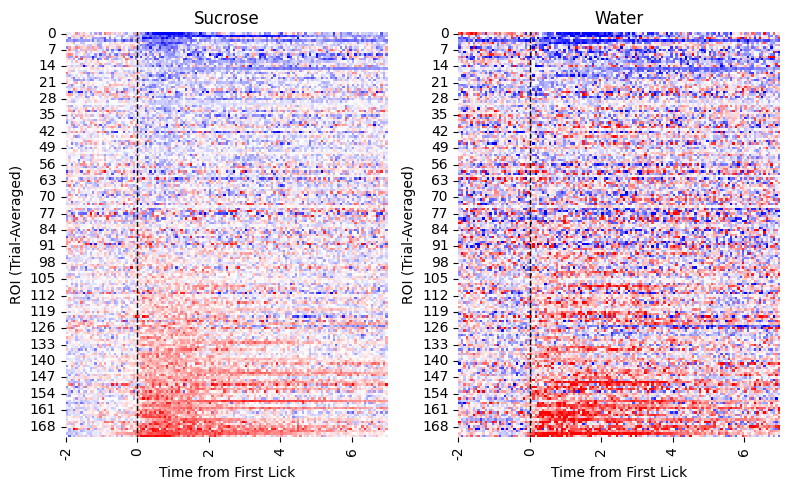

In [4]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(f_suc[:, 75:105], axis=1))
sorted_avg_mean = f_suc[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr', cbar= False)
ax.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
ax.set_title("Sucrose")

sorted_avg_mean = f_w[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap='bwr', cbar = False)
ax2.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax2.set_xticks(np.arange(15, 255, 15)[::2])
ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax2.set_ylabel("ROI (Trial-Averaged)")
ax2.set_xlabel("Time from First Lick")
ax2.set_xlim(left = 45, right = 180)
ax2.set_title("Water")
fig.tight_layout()

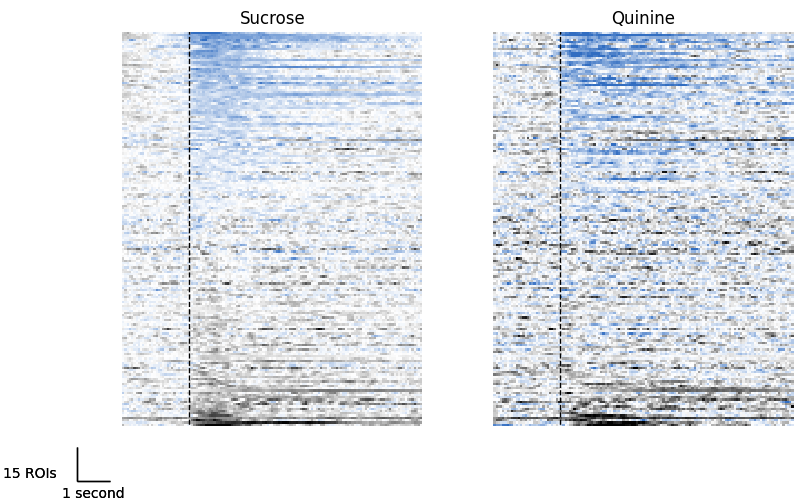

In [20]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(f_suc[:, 75:105], axis=1))[::-1]

for cell in range(f_suc.shape[0]):
    f_suc[cell, :] = p2p.moving_average(f_suc[cell, :], 3)
    f_w[cell, :] = p2p.moving_average(f_w[cell, :], 3)


sorted_avg_mean = f_suc[ascending_order, :]

sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap, cbar= False)
ax.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
ax.set_title("Sucrose")
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

sorted_avg_mean = f_w[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap=custom_cmap, cbar = False)
ax2.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax2.set_xticks(np.arange(15, 255, 15)[::2])
ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax2.set_ylabel("ROI (Trial-Averaged)")
ax2.set_xlabel("Time from First Lick")
ax2.set_xlim(left = 45, right = 180)
ax2.set_title("Quinine")
fig.tight_layout()
sb = add_scalebar(ax2, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

plt.savefig('sucrosequinine_heatmap.pdf', bbox_inches='tight')

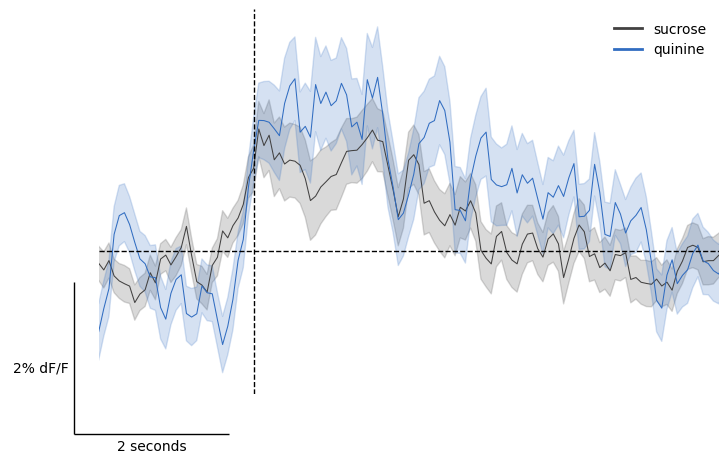

In [18]:

fig, ax = plt.subplots(1, figsize=(8, 5))
avg_f_suc = np.nanmean(f_suc, axis=0)
avg_f_w = np.nanmean(f_w, axis=0)
ax.plot(np.arange(0, 225), avg_f_suc, color = "#424141" , label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_f_w, color = "#316dc1", label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_f_suc - stats.sem(f_suc, axis=0), avg_f_suc + stats.sem(f_suc, axis=0), color = "#424141" , alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_f_w - stats.sem(f_w, axis=0), avg_f_w + stats.sem(f_w, axis=0), color = '#316dc1', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left = 45, right = 165)
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.02, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


custom_handles = [
    Line2D([0], [0], color='#424141', lw=2),
    Line2D([0], [0], color='#316dc1', lw=2)
]
custom_labels = ['sucrose', 'quinine']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

plt.savefig('sucrosequinine_avgtrace.pdf', bbox_inches='tight')


In [23]:
sucrose_activated_pvals, sucrose_inhibited_pvals, pvals, null_stats, Wobs = c2p.circ_shift(all_f_suc, aligned_suc, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))


Responsive: 70
Unresponsive: 103
Total: 173
Inhibited: 17
Activated: 53


In [24]:
alt_activated_pvals, alt_inhibited_pvals, pvals, null_stats, Wobs = c2p.circ_shift(all_f_alt, aligned_w, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))



Responsive: 44
Unresponsive: 129
Total: 173
Inhibited: 12
Activated: 32


In [16]:
suc_baseline = p2p.get_auc(all_baseline_tavg_suc, start_frame = 45, end_frame= 75, normalize = 2000)
suc_postlick = p2p.get_auc(f_suc, start_frame = 75, end_frame= 105, normalize = 2000)

w_baseline = p2p.get_auc(all_baseline_tavg_w, start_frame = 45, end_frame= 75, normalize = 2000)
w_postlick = p2p.get_auc(f_w, start_frame = 75, end_frame= 105, normalize = 2000)


In [17]:

auc_df = pd.concat([
    pd.Series(suc_baseline, name='suc_baseline'),
    pd.Series(suc_postlick, name='suc_postlick'),
    pd.Series(w_baseline, name='quinine_baseline'),
    pd.Series(w_postlick, name='quinine_postlick')
], axis=1)

# Save to CSV
auc_df.to_csv('sucrosequinine_auc.csv', index=False)

In [25]:
suc_active = f_suc[sucrose_activated_pvals <= 0.05, :]
suc_inactive = f_suc[sucrose_inhibited_pvals <= 0.05, :]
w_active = f_w[alt_activated_pvals <= 0.05, :]
w_inactive = f_w[alt_inhibited_pvals <= 0.05, :]


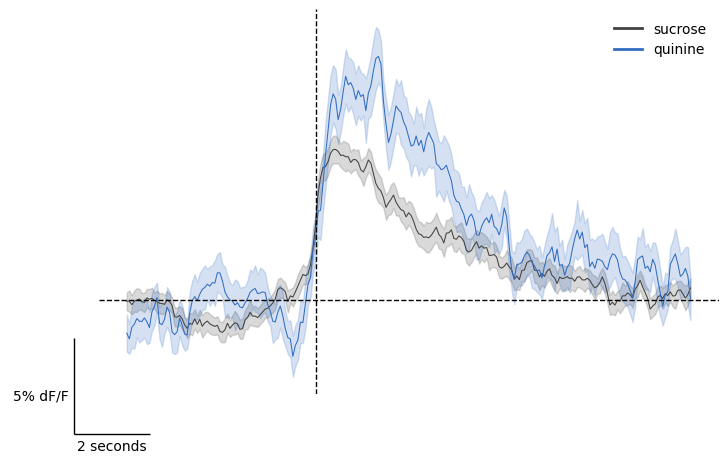

In [26]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_active, axis=0)
avg_suc_inhibited = np.nanmean(w_active, axis=0)
avg_suc_activated = p2p.moving_average(avg_suc_activated, window_size = 3)
avg_suc_inhibited = p2p.moving_average(avg_suc_inhibited, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated, color = '#424141', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = '#316dc1', label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_active, axis=0), avg_suc_activated + stats.sem(suc_active, axis=0), color = '#424141', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(w_active, axis=0), avg_suc_inhibited + stats.sem(w_active, axis=0), color = '#316dc1', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#424141', lw=2),
    Line2D([0], [0], color='#316dc1', lw=2)
]
custom_labels = ['sucrose', 'quinine']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/sucquinine_activated_avgtrace.pdf')

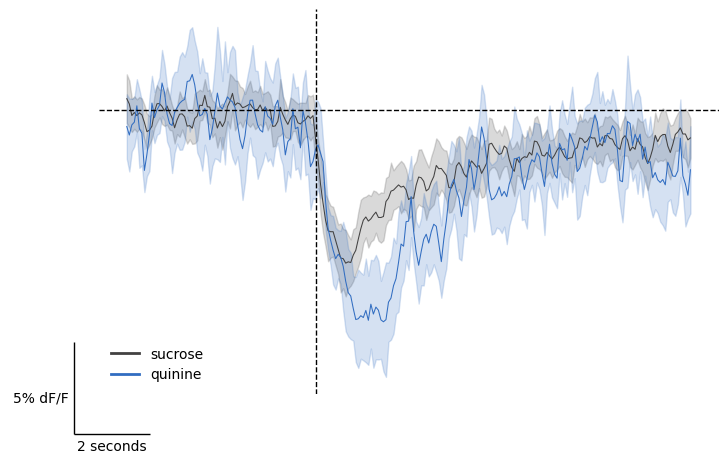

In [27]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_inactive, axis=0) 
avg_suc_inhibited = np.nanmean(w_inactive, axis=0) 
avg_suc_activated = p2p.moving_average(avg_suc_activated, window_size = 3) - np.nanmean(avg_suc_activated[30:45]) + 1
avg_suc_inhibited = p2p.moving_average(avg_suc_inhibited, window_size = 3) - np.nanmean(avg_suc_inhibited[30:45]) + 1
ax.plot(np.arange(0, 225), avg_suc_activated, color = '#424141', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = '#316dc1', label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_inactive, axis=0), avg_suc_activated + stats.sem(suc_inactive, axis=0), color = '#424141', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(w_inactive, axis=0), avg_suc_inhibited + stats.sem(w_inactive, axis=0), color = '#316dc1', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#424141', lw=2),
    Line2D([0], [0], color='#316dc1', lw=2)
]
custom_labels = ['sucrose', 'quinine']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/sucquinine_inhibited_avgtrace.pdf')

In [28]:
suc_activated_auc = p2p.get_auc(suc_active, start_frame = 75, end_frame= 105, normalize = 2000)
suc_inhibited_auc = p2p.get_auc(suc_inactive, start_frame = 75, end_frame= 105, normalize = 2000)
alt_activated_auc = p2p.get_auc(w_active, start_frame = 75, end_frame= 105, normalize = 2000)
alt_inhibited_auc = p2p.get_auc(w_inactive, start_frame = 75, end_frame= 105, normalize = 2000)



auc_df = pd.concat([
    pd.Series(suc_activated_auc, name='suc_activated_auc'),
    pd.Series(suc_inhibited_auc, name='suc_inhibited_auc'),
    pd.Series(alt_activated_auc, name='alt_activated_auc'),
    pd.Series(alt_inhibited_auc, name='alt_inhibited_auc')], axis=1)

# Save to CSV
auc_df.to_csv('results/sucquinine_responsiveprops_auc.csv', index=False)